# Semester Project : Stock Recomendation using AI - STOCKBOT

## 1. Import Necessary Libraries :

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

## 2. Import Datasets from Yahoo Finance :

Let us use Apple, Amazon, Facebook, Google and Netflix stock to demonstrate the working of stock bot with given start and end date range.

In [ ]:
df_aapl = web.DataReader('AAPL', data_source='yahoo', start='2012-01-03', end='2021-11-14')
df_aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591939
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659608
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800157
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933962
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913449
...,...,...,...,...,...,...
2021-11-08,151.570007,150.160004,151.410004,150.440002,55020900.0,150.440002
2021-11-09,151.429993,150.059998,150.199997,150.809998,56787900.0,150.809998
2021-11-10,150.130005,147.850006,150.020004,147.919998,65187100.0,147.919998


In [ ]:
df_amzn = web.DataReader('AMZN', data_source='yahoo', start='2012-01-03', end='2021-11-14')
df_amzn

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2021-11-08,3579.000000,3487.860107,3523.239990,3488.979980,3074000,3488.979980
2021-11-09,3593.770020,3501.429932,3515.250000,3576.229980,4294900,3576.229980
2021-11-10,3605.449951,3463.090088,3563.870117,3482.050049,4027400,3482.050049


In [ ]:
df_fb = web.DataReader('FB', data_source='yahoo', start='2012-01-03', end='2021-11-14')
df_fb

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...
2021-11-08,344.790009,338.339996,344.420013,338.619995,18342500,338.619995
2021-11-09,341.309998,334.470001,340.000000,335.369995,17556700,335.369995
2021-11-10,333.190002,325.510010,332.489990,327.640015,21872600,327.640015


In [ ]:
df_nflx = web.DataReader('NFLX', data_source='yahoo', start='2012-01-03', end='2021-11-14')
df_nflx

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,10.388571,10.018571,10.040000,10.320000,29213800.0,10.320000
2012-01-04,11.567143,10.258571,10.335714,11.492857,100489900.0,11.492857
2012-01-05,11.694286,11.040000,11.345714,11.328571,86552900.0,11.328571
2012-01-06,12.471429,11.242857,11.302857,12.327143,125610800.0,12.327143
2012-01-09,14.235714,12.448571,12.801429,14.025714,214073300.0,14.025714
...,...,...,...,...,...,...
2021-11-08,656.000000,643.789978,650.289978,651.450012,2887500.0,651.450012
2021-11-09,660.500000,650.520020,653.700012,655.989990,2415600.0,655.989990
2021-11-10,660.330017,642.109985,653.010010,646.909973,2405800.0,646.909973


In [ ]:
df_goog = web.DataReader('GOOG', data_source='yahoo', start='2012-01-03', end='2021-11-14')
df_goog

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,332.827484,324.966949,325.250885,331.462585,7380561.0,331.462585
2012-01-04,333.873566,329.076538,331.273315,332.892242,5749470.0,332.892242
2012-01-05,330.745270,326.889740,329.828735,328.274536,6590410.0,328.274536
2012-01-06,328.767700,323.681763,328.344299,323.796326,5405987.0,323.796326
2012-01-09,322.291962,309.455078,322.042908,310.067780,11688849.0,310.067780
...,...,...,...,...,...,...
2021-11-08,3020.689941,2982.399902,3000.000000,2987.030029,919400.0,2987.030029
2021-11-09,3007.570068,2950.139893,2994.919922,2984.969971,843800.0,2984.969971
2021-11-10,2974.000000,2906.500000,2960.195068,2932.520020,1135400.0,2932.520020


## 3. Plot the Closing Prices of the stocks over the years :

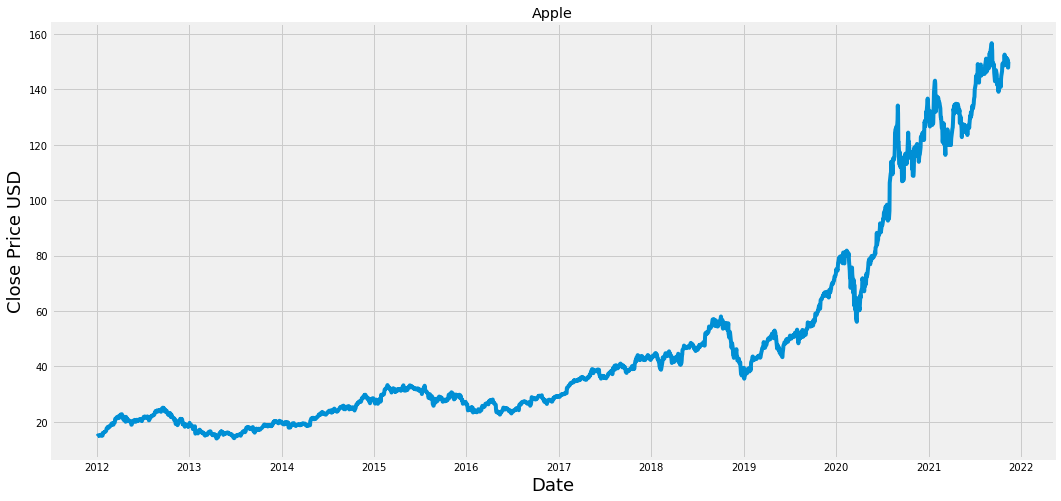

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.plot(df_aapl['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

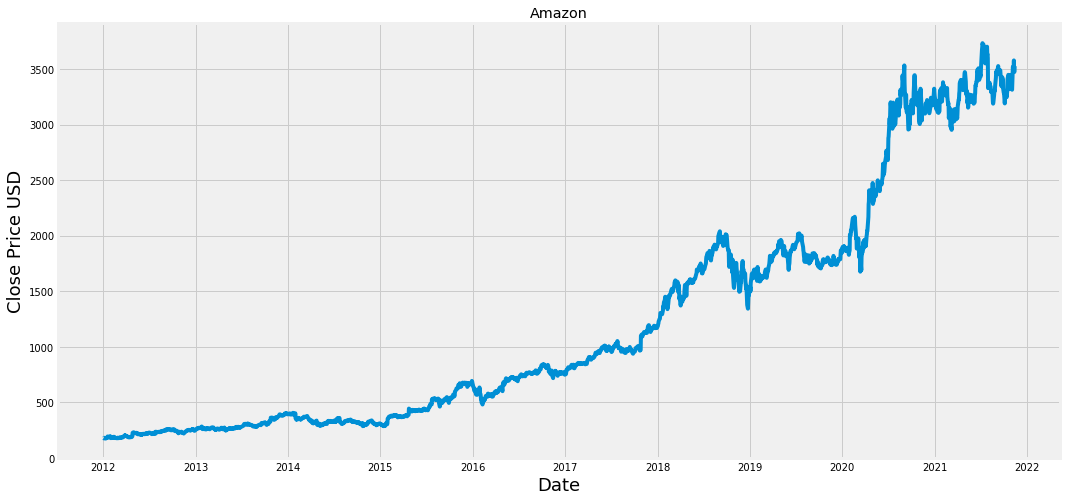

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Amazon')
plt.plot(df_amzn['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

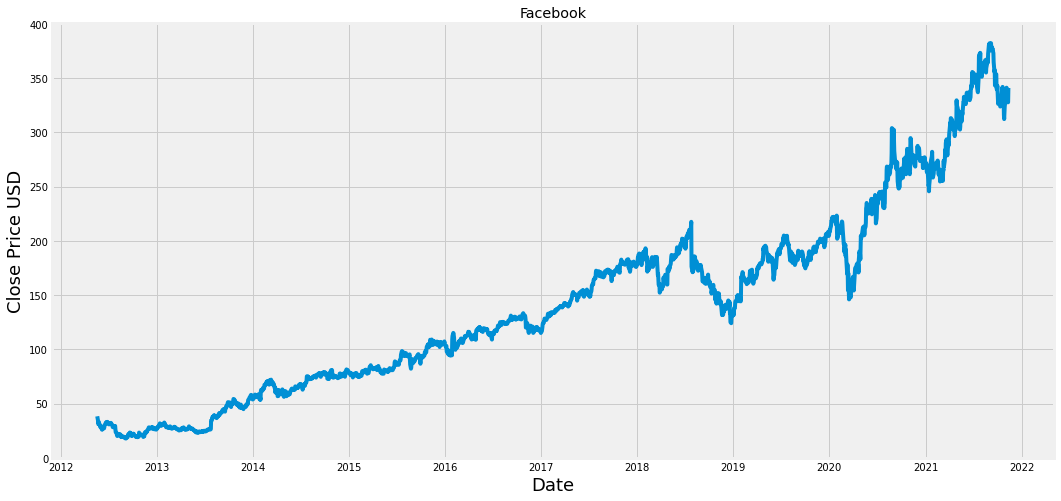

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Facebook')
plt.plot(df_fb['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

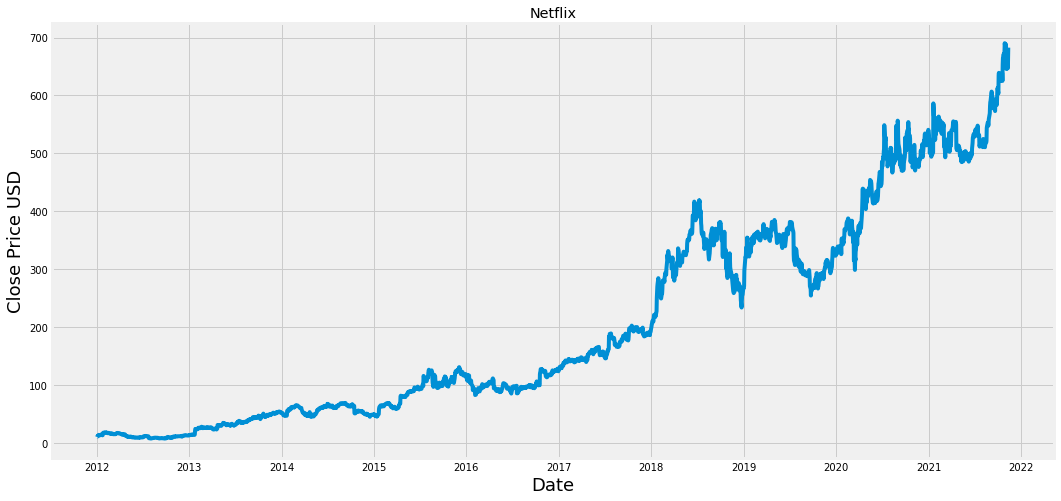

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.plot(df_nflx['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

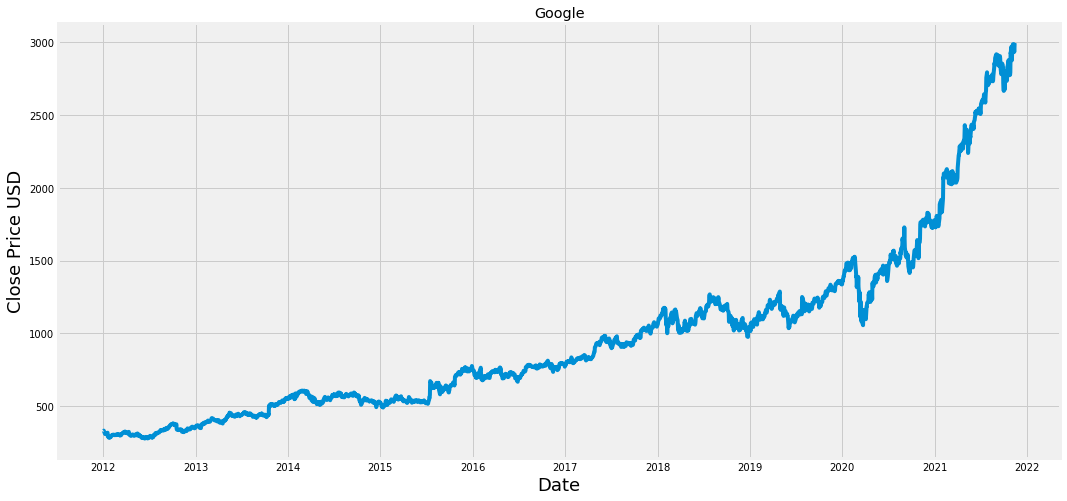

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Google')
plt.plot(df_goog['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

## 4. Extract Closing Prices :

In [ ]:
data_aapl = df_aapl.filter(['Close'])
data_aapl2 = df_aapl.filter(['Close'])
data_aapl3 = df_aapl.filter(['Close'])
data_amzn = df_amzn.filter(['Close'])
data_amzn2 = df_aapl.filter(['Close'])
data_amzn3 = df_aapl.filter(['Close'])
data_fb = df_fb.filter(['Close'])
data_fb2 = df_fb.filter(['Close'])
data_fb3 = df_fb.filter(['Close'])
data_nflx = df_nflx.filter(['Close'])
data_nflx2 = df_nflx.filter(['Close'])
data_nflx3 = df_nflx.filter(['Close'])
data_goog = df_goog.filter(['Close'])
data_goog2 = df_goog.filter(['Close'])
data_goog3 = df_goog.filter(['Close'])

## 5. Calculate % Changes between consecutive closing prices :

In [ ]:
data_aapl = data_aapl.pct_change(freq='D')
data_aapl['Close'] *= 100
data_aapl['Close'] = data_aapl['Close'].replace(np.nan, 0)
data_aapl

,Close
Date,
2012-01-03,0.000000
2012-01-04,0.537408
2012-01-05,1.110200
2012-01-06,1.045381
2012-01-09,0.000000
...,...
2021-11-08,0.000000
2021-11-09,0.245942
2021-11-10,-1.916318


In [ ]:
data_amzn = data_amzn.pct_change(freq='D')
data_amzn['Close'] *= 100
data_amzn['Close'] = data_amzn['Close'].replace(np.nan, 0)
data_amzn

,Close
Date,
2012-01-03,0.000000
2012-01-04,-0.849022
2012-01-05,0.056338
2012-01-06,2.815157
2012-01-09,0.000000
...,...
2021-11-08,0.000000
2021-11-09,2.500731
2021-11-10,-2.633498


In [ ]:
data_fb = data_fb.pct_change(freq='D')
data_fb['Close'] *= 100
data_fb['Close'] = data_fb['Close'].replace(np.nan, 0)
data_fb

,Close
Date,
2012-05-18,0.000000
2012-05-21,0.000000
2012-05-22,-8.903905
2012-05-23,3.225806
2012-05-24,3.218746
...,...
2021-11-08,0.000000
2021-11-09,-0.959778
2021-11-10,-2.304911


In [ ]:
data_nflx = data_nflx.pct_change(freq='D')
data_nflx['Close'] *= 100
data_nflx['Close'] = data_nflx['Close'].replace(np.nan, 0)
data_nflx

,Close
Date,
2012-01-03,0.000000
2012-01-04,11.364897
2012-01-05,-1.429459
2012-01-06,8.814628
2012-01-09,0.000000
...,...
2021-11-08,0.000000
2021-11-09,0.696904
2021-11-10,-1.384170


In [ ]:
data_goog = data_goog.pct_change(freq='D')
data_goog['Close'] *= 100
data_goog['Close'] = data_goog['Close'].replace(np.nan, 0)
data_goog

,Close
Date,
2012-01-03,0.000000
2012-01-04,0.431318
2012-01-05,-1.387147
2012-01-06,-1.364166
2012-01-09,0.000000
...,...
2021-11-08,0.000000
2021-11-09,-0.068967
2021-11-10,-1.757135


## 6. Sort % change :

In [ ]:
data_aapl.sort_values('Close', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last', ignore_index=False, key=None)
data_aapl

,Close
Date,
2013-01-24,-12.355785
2019-01-03,-9.960737
2020-03-12,-9.875467
2020-09-03,-8.006086
2014-01-28,-7.992723
...,...
2014-04-24,8.198189
2012-04-25,8.874128
2020-03-24,10.032540


In [ ]:
data_amzn.sort_values('Close', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last', ignore_index=False, key=None)
data_amzn

,Close
Date,
2014-01-31,-10.997247
2014-04-25,-9.882844
2014-07-25,-9.648358
2014-10-24,-8.340250
2020-03-12,-7.922081
...,...
2015-07-24,9.797169
2017-10-27,13.216371
2015-01-30,13.711592


In [ ]:
data_fb.sort_values('Close', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last', ignore_index=False, key=None)
data_fb

,Close
Date,
2018-07-26,-18.960922
2012-07-27,-11.694604
2020-03-12,-9.263395
2012-05-22,-8.903905
2012-07-26,-8.486707
...,...
2012-11-14,12.588116
2014-01-30,14.104247
2016-01-28,15.521444


In [ ]:
data_nflx.sort_values('Close', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last', ignore_index=False, key=None)
data_nflx

,Close
Date,
2012-07-25,-25.015547
2014-10-16,-19.369585
2012-04-24,-13.904161
2016-07-19,-13.126203
2016-04-19,-12.970484
...,...
2015-04-16,18.211829
2016-10-18,19.028053
2012-01-26,22.064393


In [ ]:
data_goog.sort_values('Close', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last', ignore_index=False, key=None)
data_goog

,Close
Date,
2012-01-20,-8.377507
2020-03-12,-8.268814
2012-10-18,-8.006722
2019-04-30,-7.696608
2020-06-26,-5.649638
...,...
2020-04-29,8.738960
2020-03-13,9.401651
2019-07-26,10.448543


## 7. Find Cummulative distribution of data values :

In [ ]:
n1 = len(data_aapl.axes[0])
n1

2484

In [ ]:
n2 = len(data_amzn.axes[0])
n2

2484

In [ ]:
n3 = len(data_fb.axes[0])
n3

2389

In [ ]:
n4 = len(data_nflx.axes[0])
n4

2484

In [ ]:
n5 = len(data_goog.axes[0])
n5

2484

In [ ]:
cumm_count1 = []
for i in range(n1):
  cumm_count1.append(i+1)

cumm_count2 = []
for i in range(n2):
  cumm_count2.append(i+1)

cumm_count3 = []
for i in range(n3):
  cumm_count3.append(i+1)

cumm_count4 = []
for i in range(n4):
  cumm_count4.append(i+1)

cumm_count5 = []
for i in range(n5):
  cumm_count5.append(i+1)

In [ ]:
for i in range(n1):
  cumm_count1[i] = cumm_count1[i] / n1

for i in range(n2):
  cumm_count2[i] = cumm_count2[i] / n2

for i in range(n3):
  cumm_count3[i] = cumm_count3[i] / n3

for i in range(n4):
  cumm_count4[i] = cumm_count4[i] / n4

for i in range(n5):
  cumm_count5[i] = cumm_count5[i] / n5

In [ ]:
data_aapl['cumm_dist'] = cumm_count1
data_aapl

,Close,cumm_dist
Date,,
2013-01-24,-12.355785,0.000403
2019-01-03,-9.960737,0.000805
2020-03-12,-9.875467,0.001208
2020-09-03,-8.006086,0.001610
2014-01-28,-7.992723,0.002013
...,...,...
2014-04-24,8.198189,0.998390
2012-04-25,8.874128,0.998792
2020-03-24,10.032540,0.999195


In [ ]:
data_amzn['cumm_dist'] = cumm_count2
data_amzn

,Close,cumm_dist
Date,,
2014-01-31,-10.997247,0.000403
2014-04-25,-9.882844,0.000805
2014-07-25,-9.648358,0.001208
2014-10-24,-8.340250,0.001610
2020-03-12,-7.922081,0.002013
...,...,...
2015-07-24,9.797169,0.998390
2017-10-27,13.216371,0.998792
2015-01-30,13.711592,0.999195


In [ ]:
data_fb['cumm_dist'] = cumm_count3
data_fb

,Close,cumm_dist
Date,,
2018-07-26,-18.960922,0.000419
2012-07-27,-11.694604,0.000837
2020-03-12,-9.263395,0.001256
2012-05-22,-8.903905,0.001674
2012-07-26,-8.486707,0.002093
...,...,...
2012-11-14,12.588116,0.998326
2014-01-30,14.104247,0.998744
2016-01-28,15.521444,0.999163


In [ ]:
data_nflx['cumm_dist'] = cumm_count4
data_nflx

,Close,cumm_dist
Date,,
2012-07-25,-25.015547,0.000403
2014-10-16,-19.369585,0.000805
2012-04-24,-13.904161,0.001208
2016-07-19,-13.126203,0.001610
2016-04-19,-12.970484,0.002013
...,...,...
2015-04-16,18.211829,0.998390
2016-10-18,19.028053,0.998792
2012-01-26,22.064393,0.999195


In [ ]:
data_goog['cumm_dist'] = cumm_count5
data_goog

,Close,cumm_dist
Date,,
2012-01-20,-8.377507,0.000403
2020-03-12,-8.268814,0.000805
2012-10-18,-8.006722,0.001208
2019-04-30,-7.696608,0.001610
2020-06-26,-5.649638,0.002013
...,...,...
2020-04-29,8.738960,0.998390
2020-03-13,9.401651,0.998792
2019-07-26,10.448543,0.999195


## 8. Take user investment inputs to determine risk :

In [ ]:
initial_investment = int(input("Enter initial investment :"))

Enter initial investment :1000


In [ ]:
target_price = int(input("Enter target price :"))

Enter target price :1200


In [ ]:
no_of_days = int(input("Enter number of days of investment :"))

Enter number of days of investment :10


In [ ]:
percent_change_required = 100 * (target_price - initial_investment) / initial_investment
percent_change_required

20.0

In [ ]:
per_day_change = percent_change_required / no_of_days
per_day_change

2.0

In [ ]:
if (per_day_change >= 0 and per_day_change <4):
  investment = 'low risk'
elif (per_day_change >= 4 and per_day_change <8):
  investment = 'mid risk'
elif (per_day_change >= 8):
  investment = 'high risk'
else:
  investment = 'loss'
investment

'low risk'

## 9. Extract data from table w.r.t. risk user is willing to take :

In [ ]:
lowrisk_aapl = data_aapl[data_aapl['Close'] >= 0]
midrisk_aapl = data_aapl[data_aapl['Close'] >= 4]
highrisk_aapl = data_aapl[data_aapl['Close'] >= 8]

In [ ]:
lowrisk_aapl = lowrisk_aapl[lowrisk_aapl['Close'] < 4]
midrisk_aapl = midrisk_aapl[midrisk_aapl['Close'] < 8]

In [ ]:
lowrisk_aapl

,Close,cumm_dist
Date,,
2013-07-22,0.000000,0.386473
2018-06-11,0.000000,0.386876
2018-06-04,0.000000,0.387279
2018-02-12,0.000000,0.387681
2013-04-08,0.000000,0.388084
...,...,...
2018-11-28,3.845269,0.984702
2018-05-04,3.923344,0.985105
2016-03-01,3.971451,0.985507


In [ ]:
midrisk_aapl

,Close,cumm_dist
Date,,
2021-03-09,4.064967,0.986715
2020-11-04,4.083660,0.987118
2015-10-28,4.120466,0.987520
2013-01-16,4.150882,0.987923
2018-02-06,4.179176,0.988325
2019-08-13,4.234839,0.988728
2019-01-04,4.268930,0.989130
2015-09-02,4.288893,0.989533
2020-03-17,4.397008,0.989936


In [ ]:
highrisk_aapl

,Close,cumm_dist
Date,,
2014-04-24,8.198189,0.998390
2012-04-25,8.874128,0.998792
2020-03-24,10.032540,0.999195
2020-07-31,10.468863,0.999597
2020-03-13,11.980827,1.000000


In [ ]:
lowrisk_amzn = data_amzn[data_amzn['Close'] >= 0]
midrisk_amzn = data_amzn[data_amzn['Close'] >= 4]
highrisk_amzn = data_amzn[data_amzn['Close'] >= 8]
lowrisk_amzn = lowrisk_amzn[lowrisk_amzn['Close'] < 4]
midrisk_amzn = midrisk_amzn[midrisk_amzn['Close'] < 8]

In [ ]:
lowrisk_amzn

,Close,cumm_dist
Date,,
2016-10-24,0.000000,0.364332
2019-12-23,0.000000,0.364734
2019-03-04,0.000000,0.365137
2019-10-21,0.000000,0.365539
2019-03-18,0.000000,0.365942
...,...,...
2020-09-09,3.770668,0.981079
2018-02-06,3.801436,0.981481
2013-01-25,3.850654,0.981884


In [ ]:
midrisk_amzn

,Close,cumm_dist
Date,,
2012-07-19,4.000550,0.983092
2018-10-12,4.027661,0.983494
2020-08-18,4.087471,0.983897
2013-02-13,4.163119,0.984300
2018-11-01,4.225256,0.984702
2020-04-30,4.268960,0.985105
2012-01-18,4.282725,0.985507
2018-04-17,4.323965,0.985910
2020-07-01,4.345332,0.986312


In [ ]:
highrisk_amzn

,Close,cumm_dist
Date,,
2016-01-28,8.914031,0.997182
2013-10-25,9.385637,0.997585
2016-04-29,9.566450,0.997987
2015-07-24,9.797169,0.998390
2017-10-27,13.216371,0.998792
2015-01-30,13.711592,0.999195
2015-04-24,14.131136,0.999597
2012-04-27,15.745701,1.000000


In [ ]:
lowrisk_fb = data_fb[data_fb['Close'] >= 0]
midrisk_fb = data_fb[data_fb['Close'] >= 4]
highrisk_fb = data_fb[data_fb['Close'] >= 8]
lowrisk_fb = lowrisk_fb[lowrisk_fb['Close'] < 4]
midrisk_fb = midrisk_fb[midrisk_fb['Close'] < 8]

In [ ]:
lowrisk_fb

,Close,cumm_dist
Date,,
2016-09-06,0.000000,0.370029
2018-11-05,0.000000,0.370448
2016-10-17,0.000000,0.370866
2016-08-22,0.000000,0.371285
2018-07-02,0.000000,0.371704
...,...,...
2012-08-10,3.807707,0.970280
2018-10-31,3.809323,0.970699
2013-10-18,3.849841,0.971118


In [ ]:
midrisk_fb

,Close,cumm_dist
Date,,
2021-11-12,4.012334,0.972373
2016-01-22,4.014442,0.972792
2012-08-15,4.023561,0.973211
2014-03-05,4.026158,0.973629
2013-12-04,4.044510,0.974048
2021-03-09,4.085227,0.974466
2013-03-07,4.116572,0.974885
2021-03-19,4.123893,0.975303
2020-10-21,4.174770,0.975722


In [ ]:
highrisk_fb

,Close,cumm_dist
Date,,
2020-07-31,8.174839,0.995396
2020-08-26,8.222347,0.995814
2020-11-04,8.322660,0.996233
2020-03-24,8.696819,0.996651
2018-04-26,9.061307,0.997070
2020-03-13,10.234995,0.997488
2019-01-31,10.816384,0.997907
2012-11-14,12.588116,0.998326
2014-01-30,14.104247,0.998744


In [ ]:
lowrisk_nflx = data_nflx[data_nflx['Close'] >= 0]
midrisk_nflx = data_nflx[data_nflx['Close'] >= 4]
highrisk_nflx = data_nflx[data_nflx['Close'] >= 8]
lowrisk_nflx = lowrisk_nflx[lowrisk_nflx['Close'] < 4]
midrisk_nflx = midrisk_nflx[midrisk_nflx['Close'] < 8]

In [ ]:
lowrisk_nflx

,Close,cumm_dist
Date,,
2019-03-18,0.000000,0.380032
2018-10-15,0.000000,0.380435
2018-11-12,0.000000,0.380837
2018-07-16,0.000000,0.381240
2018-07-23,0.000000,0.381643
...,...,...
2018-09-12,3.938982,0.949275
2018-05-23,3.950306,0.949678
2019-01-11,3.982626,0.950081


In [ ]:
midrisk_nflx

,Close,cumm_dist
Date,,
2013-05-15,4.030426,0.951288
2012-02-14,4.032124,0.951691
2012-01-18,4.032933,0.952093
2020-03-04,4.073005,0.952496
2012-07-12,4.078878,0.952899
...,...,...
2020-03-17,6.997057,0.989130
2014-04-22,7.004501,0.989533
2020-01-23,7.239266,0.989936


In [ ]:
highrisk_nflx

,Close,cumm_dist
Date,,
2020-07-10,8.068767,0.991143
2015-08-26,8.481088,0.991546
2012-01-06,8.814628,0.991948
2018-04-17,9.188381,0.992351
2016-01-06,9.307074,0.992754
2019-01-04,9.723449,0.993156
2018-01-23,9.978905,0.993559
2012-10-03,10.839533,0.993961
2012-01-04,11.364897,0.994364


In [ ]:
lowrisk_goog = data_goog[data_goog['Close'] >= 0]
midrisk_goog = data_goog[data_goog['Close'] >= 4]
highrisk_goog = data_goog[data_goog['Close'] >= 8]
lowrisk_goog = lowrisk_goog[lowrisk_goog['Close'] < 4]
midrisk_goog = midrisk_goog[midrisk_goog['Close'] < 8]

In [ ]:
lowrisk_goog

,Close,cumm_dist
Date,,
2017-10-30,0.000000,0.364734
2018-11-12,0.000000,0.365137
2017-01-09,0.000000,0.365539
2016-07-11,0.000000,0.365942
2019-04-08,0.000000,0.366345
...,...,...
2014-07-18,3.721266,0.987923
2014-04-16,3.746916,0.988325
2020-04-22,3.853363,0.988728


In [ ]:
midrisk_goog

,Close,cumm_dist
Date,,
2018-11-28,4.004169,0.989936
2014-01-31,4.014479,0.990338
2020-09-02,4.068746,0.990741
2020-04-14,4.243727,0.991143
2015-08-11,4.268387,0.991546
2018-10-25,4.269493,0.991948
2016-01-28,4.424354,0.992351
2013-04-19,4.433934,0.992754
2015-01-30,4.672392,0.993156


In [ ]:
highrisk_goog

,Close,cumm_dist
Date,,
2020-04-29,8.738960,0.998390
2020-03-13,9.401651,0.998792
2019-07-26,10.448543,0.999195
2013-10-18,13.796286,0.999597
2015-07-17,16.052431,1.000000


## 10. Extract Probability scores as per risk taken :

In [ ]:
lr1 = len(lowrisk_aapl.axes[0])
lr1

1491

In [ ]:
lr2 = len(lowrisk_amzn.axes[0])
lr2

1537

In [ ]:
lr3 = len(lowrisk_fb.axes[0])
lr3

1439

In [ ]:
lr4 = len(lowrisk_nflx.axes[0])
lr4

1419

In [ ]:
lr5 = len(lowrisk_goog.axes[0])
lr5

1553

In [ ]:
mr1 = len(midrisk_aapl.axes[0])
mr1

29

In [ ]:
mr2 = len(midrisk_amzn.axes[0])
mr2

35

In [ ]:
mr3 = len(midrisk_fb.axes[0])
mr3

55

In [ ]:
mr4 = len(midrisk_nflx.axes[0])
mr4

99

In [ ]:
mr5 = len(midrisk_goog.axes[0])
mr5

21

In [ ]:
hr1 = len(highrisk_aapl.axes[0])
hr1

5

In [ ]:
hr2 = len(highrisk_amzn.axes[0])
hr2

8

In [ ]:
hr3 = len(highrisk_fb.axes[0])
hr3

12

In [ ]:
hr4 = len(highrisk_nflx.axes[0])
hr4

23

In [ ]:
hr5 = len(highrisk_goog.axes[0])
hr5

5

In [ ]:
prob_aapl = 0
prob_amzn = 0
prob_fb = 0
prob_nflx = 0
prob_goog = 0

In [ ]:
if investment == 'low risk':
  prob_aapl = lowrisk_aapl["cumm_dist"][lr1-1] - lowrisk_aapl["cumm_dist"][0]
  prob_amzn = lowrisk_amzn["cumm_dist"][lr2-1] - lowrisk_amzn["cumm_dist"][0]
  prob_fb = lowrisk_fb["cumm_dist"][lr3-1] - lowrisk_fb["cumm_dist"][0]
  prob_nflx = lowrisk_nflx["cumm_dist"][lr4-1] - lowrisk_nflx["cumm_dist"][0]
  prob_goog = lowrisk_goog["cumm_dist"][lr5-1] - lowrisk_goog["cumm_dist"][0]

In [ ]:
if investment == 'mid risk':
  prob_aapl = midrisk_aapl["cumm_dist"][mr1-1] - midrisk_aapl["cumm_dist"][0]
  prob_amzn = midrisk_amzn["cumm_dist"][mr2-1] - midrisk_amzn["cumm_dist"][0]
  prob_fb = midrisk_fb["cumm_dist"][mr3-1] - midrisk_fb["cumm_dist"][0]
  prob_nflx = midrisk_nflx["cumm_dist"][mr4-1] - midrisk_nflx["cumm_dist"][0]
  prob_goog = midrisk_goog["cumm_dist"][mr5-1] - midrisk_goog["cumm_dist"][0]

In [ ]:
if investment == 'high risk':
  prob_aapl = highrisk_aapl["cumm_dist"][hr1-1] - highrisk_aapl["cumm_dist"][0]
  prob_amzn = highrisk_amzn["cumm_dist"][hr2-1] - highrisk_amzn["cumm_dist"][0]
  prob_fb = highrisk_fb["cumm_dist"][hr3-1] - highrisk_fb["cumm_dist"][0]
  prob_nflx = highrisk_nflx["cumm_dist"][hr4-1] - highrisk_nflx["cumm_dist"][0]
  prob_goog = highrisk_goog["cumm_dist"][hr5-1] - highrisk_goog["cumm_dist"][0]

In [ ]:
prob_aapl

0.5998389694041868

In [ ]:
prob_amzn

0.6183574879227054

In [ ]:
prob_fb

0.6019254918375889

In [ ]:
prob_nflx

0.57085346215781

In [ ]:
prob_goog

0.6247987117552334

Thus it can be concluded that google is the safest stock to buy since it has the highest probability of rising in low risk. Thus can be a great long term investment.

## 11. Simple Moving Average Stock Trading Strategy :

In [ ]:
def SMA(data, period = 30, column = 'Close'):
  return data[column].rolling(window=period).mean()

In [ ]:
data_aapl2['SMA'] = SMA(data_aapl2)
data_amzn2['SMA'] = SMA(data_amzn2)
data_fb2['SMA'] = SMA(data_fb2)
data_nflx2['SMA'] = SMA(data_nflx2)
data_goog2['SMA'] = SMA(data_goog2)

In [ ]:
def strategy(data):
  buy = []
  sell = []
  flag = 0
  buy_price = 0
  for i in range(0, len(data)):
    if data['SMA'][i] > data['Close'][i] and flag == 0:
      buy.append(data['Close'][i])
      sell.append(np.nan)
      buy_price = data['Close'][i]
      flag = 1
    elif data['SMA'][i] < data['Close'][i] and flag == 1 and buy_price < data['Close'][i]:
      sell.append(data['Close'][i])
      buy.append(np.nan)
      buy_price = 0
      flag = 0
    else:
      sell.append(np.nan)
      buy.append(np.nan)
  return(buy, sell, buy_price)


In [ ]:
strat_aapl = strategy(data_aapl2)
data_aapl2['Buy'] = strat_aapl[0]
data_aapl2['Sell'] = strat_aapl[1]
buyprice_aapl = strat_aapl[2]
buyprice_aapl

0

In [ ]:
strat_amzn = strategy(data_amzn2)
data_amzn2['Buy'] = strat_amzn[0]
data_amzn2['Sell'] = strat_amzn[1]
buyprice_amzn = strat_amzn[2]
buyprice_amzn

0

In [ ]:
strat_fb = strategy(data_fb2)
data_fb2['Buy'] = strat_fb[0]
data_fb2['Sell'] = strat_fb[1]
buyprice_fb = strat_fb[2]
buyprice_fb

364.7200012207031

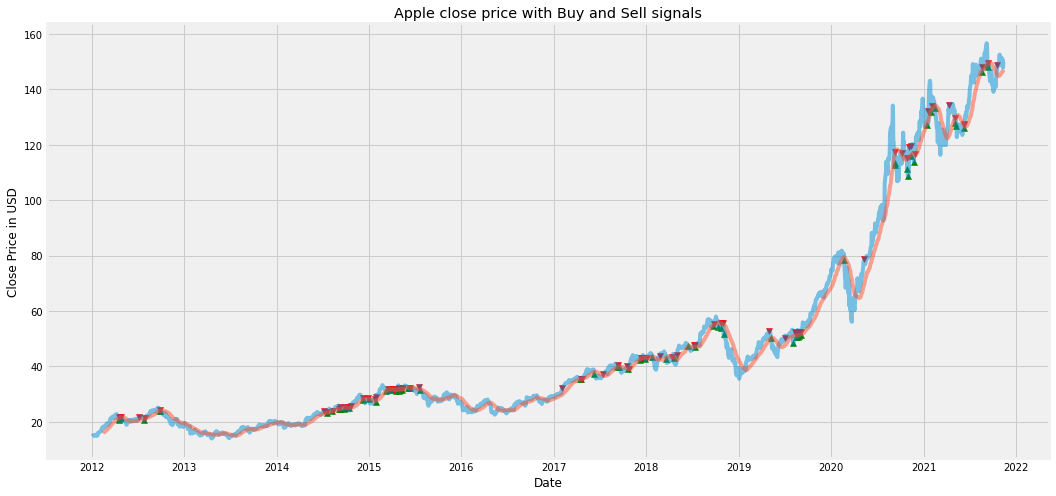

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Apple close price with Buy and Sell signals')
plt.plot(data_aapl2['Close'], alpha = 0.5, label = 'Close')
plt.plot(data_aapl2['SMA'], alpha = 0.5, label = 'SMA')
plt.scatter(data_aapl2.index, data_aapl2['Buy'], color = 'green', label = 'Buy Signal', marker = '^', alpha = 1)
plt.scatter(data_aapl2.index, data_aapl2['Sell'], color = 'red', label = 'Sell Signal', marker = 'v', alpha = 1)
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.show()

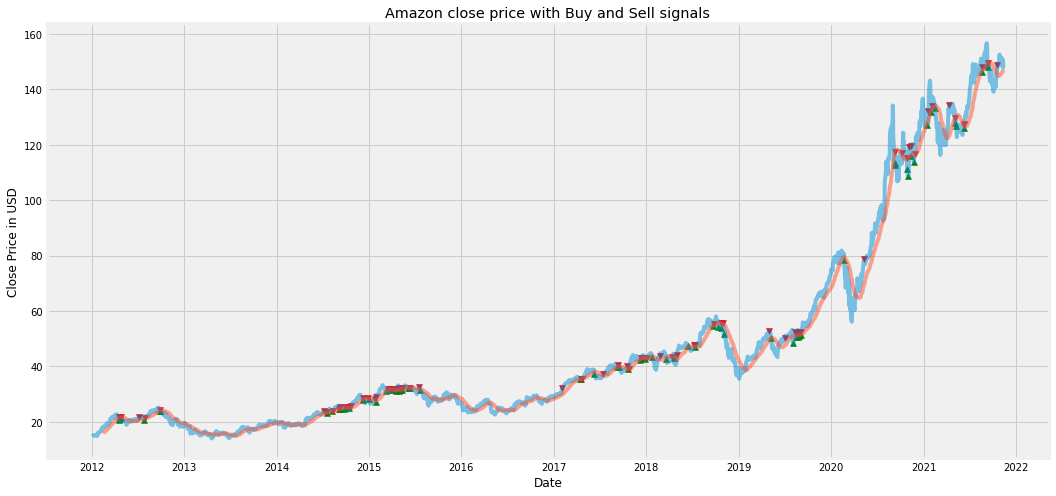

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Amazon close price with Buy and Sell signals')
plt.plot(data_amzn2['Close'], alpha = 0.5, label = 'Close')
plt.plot(data_amzn2['SMA'], alpha = 0.5, label = 'SMA')
plt.scatter(data_amzn2.index, data_amzn2['Buy'], color = 'green', label = 'Buy Signal', marker = '^', alpha = 1)
plt.scatter(data_amzn2.index, data_amzn2['Sell'], color = 'red', label = 'Sell Signal', marker = 'v', alpha = 1)
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.show()

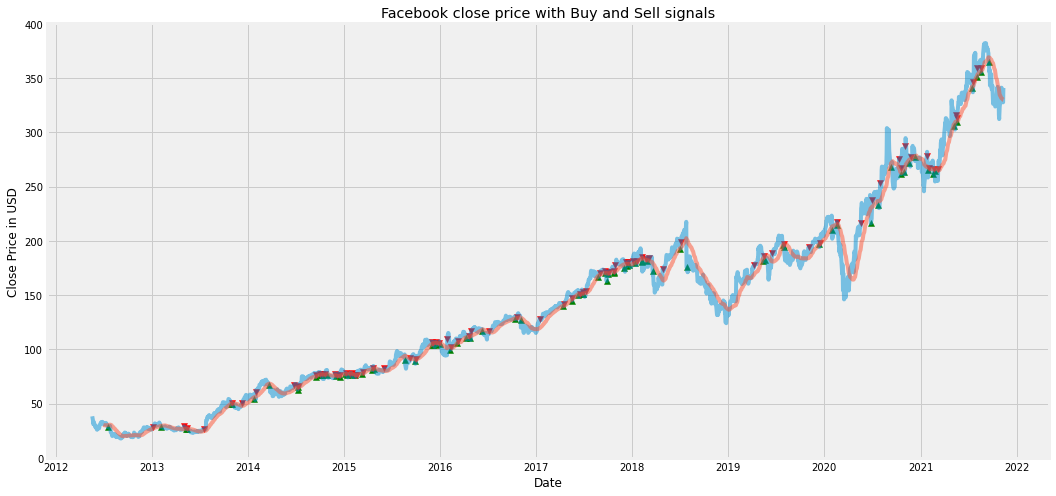

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Facebook close price with Buy and Sell signals')
plt.plot(data_fb2['Close'], alpha = 0.5, label = 'Close')
plt.plot(data_fb2['SMA'], alpha = 0.5, label = 'SMA')
plt.scatter(data_fb2.index, data_fb2['Buy'], color = 'green', label = 'Buy Signal', marker = '^', alpha = 1)
plt.scatter(data_fb2.index, data_fb2['Sell'], color = 'red', label = 'Sell Signal', marker = 'v', alpha = 1)
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.show()

## 12. Trading Strategy - best months to invest in :

In [ ]:
Jan = []
Feb = []
Mar = []
Apr = []
May = []
Jun = []
Jul = []
Aug = []
Sep = []
Oct = []
Nov = []
Dec = []

def get_returns(month, returns):
  if month == '01':
    Jan.append(float(returns))
  elif month == '02':
    Feb.append(float(returns))
  elif month == '03':
    Mar.append(float(returns))
  elif month == '04':
    Apr.append(float(returns))
  elif month == '05':
    May.append(float(returns))
  elif month == '06':
    Jun.append(float(returns))
  elif month == '07':
    Jul.append(float(returns))
  elif month == '08':
    Aug.append(float(returns))
  elif month == '09':
    Sep.append(float(returns))
  elif month == '10':
    Oct.append(float(returns))
  elif month == '11':
    Nov.append(float(returns))
  elif month == '12':
    Dec.append(float(returns))
  else:
    print('Wrong month input')

In [ ]:
DSR_amzn = data_amzn3['Close'].pct_change(1)
data_amzn3['DSR'] = DSR_amzn
data_amzn3

,Close,DSR
Date,,
2012-01-03,14.686786,NaN
2012-01-04,14.765714,0.005374
2012-01-05,14.929643,0.011102
2012-01-06,15.085714,0.010454
2012-01-09,15.061786,-0.001586
...,...,...
2021-11-08,150.440002,-0.005553
2021-11-09,150.809998,0.002459
2021-11-10,147.919998,-0.019163


In [ ]:
data_amzn3 = data_amzn3[1:]
data_amzn3

,Close,DSR
Date,,
2012-01-04,14.765714,0.005374
2012-01-05,14.929643,0.011102
2012-01-06,15.085714,0.010454
2012-01-09,15.061786,-0.001586
2012-01-10,15.115714,0.003580
...,...,...
2021-11-08,150.440002,-0.005553
2021-11-09,150.809998,0.002459
2021-11-10,147.919998,-0.019163


In [ ]:
for i in range(0, len(data_amzn3)):
  data_amzn3_date = str(data_amzn3.index[i])
  data_amzn3_return = data_amzn3['DSR'][i]
  data_amzn3_month = data_amzn3_date.split('-')[1]
  get_returns(data_amzn3_month, data_amzn3_return)

In [ ]:
def AVG(month):
  return [sum(month)/len(month)]

In [ ]:
data_amzn3_avg = pd.DataFrame()
data_amzn3_avg['AVG'] = AVG(Jan) + AVG(Feb) + AVG(Mar) + AVG(Apr) + AVG(May) + AVG(Jun) + AVG(Jul) + AVG(Aug) + AVG(Sep) + AVG(Oct) + AVG(Nov) + AVG(Dec)
data_amzn3_avg = data_amzn3_avg.set_index(data_amzn3_avg.index + 1)
data_amzn3_avg = data_amzn3_avg * 100
data_amzn3_avg

,AVG
1,0.002872
2,0.164281
3,0.134534
4,0.105987
5,0.129750
6,0.062843
7,0.296917
8,0.314790
9,-0.067700
10,0.145928


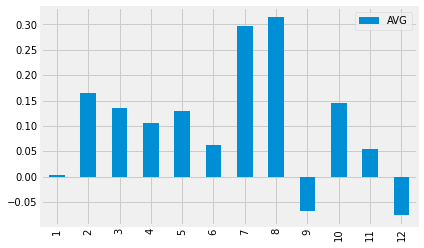

In [ ]:
data_amzn3_avg.plot.bar()

In [ ]:
DSR_aapl = data_aapl3['Close'].pct_change(1)
data_aapl3['DSR'] = DSR_aapl
data_aapl3 = data_aapl3[1:]
for i in range(0, len(data_aapl3)):
  data_aapl3_date = str(data_aapl3.index[i])
  data_aapl3_return = data_aapl3['DSR'][i]
  data_aapl3_month = data_aapl3_date.split('-')[1]
  get_returns(data_aapl3_month, data_aapl3_return)
data_aapl3_avg = pd.DataFrame()
data_aapl3_avg['AVG'] = AVG(Jan) + AVG(Feb) + AVG(Mar) + AVG(Apr) + AVG(May) + AVG(Jun) + AVG(Jul) + AVG(Aug) + AVG(Sep) + AVG(Oct) + AVG(Nov) + AVG(Dec)
data_aapl3_avg = data_aapl3_avg.set_index(data_aapl3_avg.index + 1)
data_aapl3_avg = data_aapl3_avg * 100
data_aapl3_avg

,AVG
1,0.002872
2,0.164281
3,0.134534
4,0.105987
5,0.129750
6,0.062843
7,0.296917
8,0.314790
9,-0.067700
10,0.145928


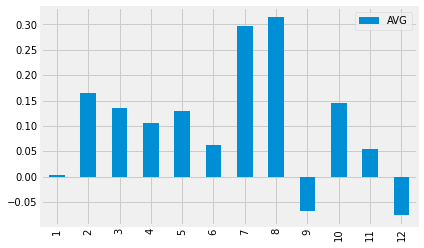

In [ ]:
data_aapl3_avg.plot.bar()

In [ ]:
DSR_fb = data_fb3['Close'].pct_change(1)
data_fb3['DSR'] = DSR_fb
data_fb3 = data_fb3[1:]
for i in range(0, len(data_fb3)):
  data_fb3_date = str(data_fb3.index[i])
  data_fb3_return = data_fb3['DSR'][i]
  data_fb3_month = data_fb3_date.split('-')[1]
  get_returns(data_fb3_month, data_fb3_return)
data_fb3_avg = pd.DataFrame()
data_fb3_avg['AVG'] = AVG(Jan) + AVG(Feb) + AVG(Mar) + AVG(Apr) + AVG(May) + AVG(Jun) + AVG(Jul) + AVG(Aug) + AVG(Sep) + AVG(Oct) + AVG(Nov) + AVG(Dec)
data_fb3_avg = data_fb3_avg.set_index(data_fb3_avg.index + 1)
data_fb3_avg = data_fb3_avg * 100
data_fb3_avg

,AVG
1,0.128778
2,0.093881
3,0.083524
4,0.187809
5,0.066792
6,0.100132
7,0.280046
8,0.235340
9,-0.018768
10,0.117600


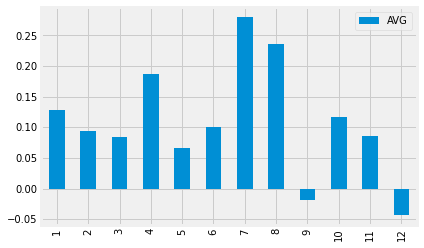

In [ ]:
data_fb3_avg.plot.bar()

In [ ]:
DSR_nflx = data_nflx3['Close'].pct_change(1)
data_nflx3['DSR'] = DSR_nflx
data_nflx3 = data_nflx3[1:]
for i in range(0, len(data_nflx3)):
  data_nflx3_date = str(data_nflx3.index[i])
  data_nflx3_return = data_nflx3['DSR'][i]
  data_nflx3_month = data_nflx3_date.split('-')[1]
  get_returns(data_nflx3_month, data_nflx3_return)
data_nflx3_avg = pd.DataFrame()
data_nflx3_avg['AVG'] = AVG(Jan) + AVG(Feb) + AVG(Mar) + AVG(Apr) + AVG(May) + AVG(Jun) + AVG(Jul) + AVG(Aug) + AVG(Sep) + AVG(Oct) + AVG(Nov) + AVG(Dec)
data_nflx3_avg = data_nflx3_avg.set_index(data_nflx3_avg.index + 1)
data_nflx3_avg = data_nflx3_avg * 100
data_nflx3_avg

,AVG
1,0.378535
2,0.134612
3,0.048001
4,0.162883
5,0.104623
6,0.105128
7,0.236189
8,0.241959
9,-0.030367
10,0.171961


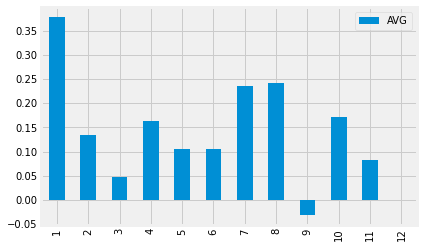

In [ ]:
data_nflx3_avg.plot.bar()

In [ ]:
DSR_goog = data_goog3['Close'].pct_change(1)
data_goog3['DSR'] = DSR_goog
data_goog3 = data_goog3[1:]
for i in range(0, len(data_goog3)):
  data_goog3_date = str(data_goog3.index[i])
  data_goog3_return = data_goog3['DSR'][i]
  data_goog3_month = data_goog3_date.split('-')[1]
  get_returns(data_goog3_month, data_goog3_return)
data_goog3_avg = pd.DataFrame()
data_goog3_avg['AVG'] = AVG(Jan) + AVG(Feb) + AVG(Mar) + AVG(Apr) + AVG(May) + AVG(Jun) + AVG(Jul) + AVG(Aug) + AVG(Sep) + AVG(Oct) + AVG(Nov) + AVG(Dec)
data_goog3_avg = data_goog3_avg.set_index(data_goog3_avg.index + 1)
data_goog3_avg = data_goog3_avg * 100
data_goog3_avg

,AVG
1,0.335737
2,0.125218
3,0.028336
4,0.155016
5,0.107757
6,0.079030
7,0.260878
8,0.210940
9,-0.025571
10,0.176209


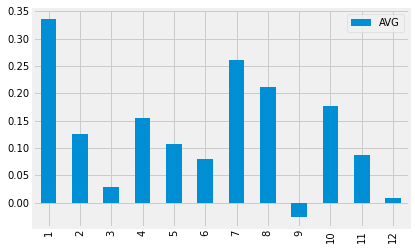

In [ ]:
data_goog3_avg.plot.bar()

## 13. Stock Sentiment Analysis:

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    print("Stock Sentiment is ", sentiment_dict['neg']*100, "% Negative")
    print("Stock Sentiment is ", sentiment_dict['neu']*100, "% Neutral")
    print("Stock Sentiment is ", sentiment_dict['pos']*100, "% Positive")
 
    print("Stock Sentiment is overall", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
 
    else :
        print("Neutral")

In [ ]:
sentence = 'Apple is continuing to work on its next set of operating system updates, and the new beta of iOS 15.2 seeded to developers and public beta testers this week includes a number of tweaks and improvements.'

In [ ]:
sentiment_scores(sentence)

Stock Sentiment is  0.0 % Negative
Stock Sentiment is  90.4 % Neutral
Stock Sentiment is  9.6 % Positive
Stock Sentiment is overall Positive


In [ ]:
sentence2 = 'Amazon has infused Rs 1,000 crore into its payments unit in India, Amazon Pay, according to regulatory documents.The fresh infusion is expected to help the company compete more aggressively against rivals like PhonePe, Google Pay and Paytm.The shares were allotted to Amazon Corporate Holdings Private Limited and Amazon.com.incs Limited, the documents filed with the corporate affairs ministry and sourced by business intelligence platform Tofler, showed'

In [ ]:
sentiment_scores(sentence2)

Stock Sentiment is  11.600000000000001 % Negative
Stock Sentiment is  65.7 % Neutral
Stock Sentiment is  22.6 % Positive
Stock Sentiment is overall Positive
